In [3]:
import numpy as np
import pandas as pd


df = pd.read_csv("/content/diagnosis.csv")
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [4]:
print(len(df))

120


In [5]:
df.columns=['temperature','nausea','lumbar_pain','urine_pushing','micturition_pains','burning_sensation','inflammation','has_nephritis']

In [6]:
df

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_sensation,inflammation,has_nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [8]:
df = df.replace(['no'],0)

In [9]:
df = df.replace(['yes'],1)

In [41]:
df

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_sensation,inflammation,has_nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [35]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics


x_cols =['temperature','nausea','lumbar_pain','urine_pushing','micturition_pains','burning_sensation','inflammation']

X = df[x_cols]
y = df['has_nephritis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# X_train
# X_test
# y_train
y_test

95     1
54     0
59     0
117    1
77     1
46     0
31     0
81     1
48     0
98     1
97     1
99     1
2      0
92     1
113    1
56     0
106    1
103    1
67     1
62     1
112    1
17     0
83     1
108    1
73     0
96     1
35     0
44     0
91     1
114    1
33     0
42     0
58     0
66     1
10     0
53     0
Name: has_nephritis, dtype: int64

In [39]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

X_test
# y_pred

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_sensation,inflammation
95,40.7,1,1,0,1,0,0
54,37.8,0,0,1,0,0,1
59,37.9,0,0,1,0,0,1
117,41.5,1,1,0,1,0,0
77,40.0,0,1,1,0,1,0
46,37.6,0,0,1,1,0,1
31,37.2,0,0,1,1,0,1
81,40.2,1,1,0,1,0,0
48,37.7,0,0,1,1,0,1
98,40.9,1,1,1,1,0,1


In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


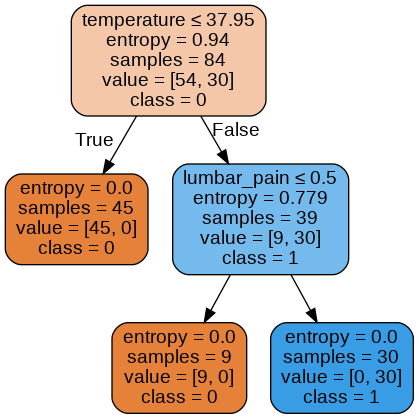

In [29]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [30]:
from sklearn.metrics import confusion_matrix

print("The confusion matrix is : ",confusion_matrix(y_test,y_pred))


The confusion matrix is :  [[16  0]
 [ 0 20]]
